# Building A Handwritten Digits Classifier

## Introduction

Deep neural networks have been used to reach state-of-the-art performance on **image classification** tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark.

In this project, we'll explore the effectiveness of **deep**, **feedforward** **neural networks** at classifying images by:

- exploring why image classification is a hard task.
- observing the limitations of traditional machine learning models for image classification.
- training, testing, and improving a few different deep neural networks for image classification.


## Working With Image Data

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of **`sklearn.datasets`**. We will import **`load_digits()`** function that returns a copy of the [hand-written digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI.

In [1]:
# Import libraries
from sklearn.datasets import load_digits
import pandas as pd
pd.options.display.max_columns = 150 # avoid displaying truncated columns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset as a pandas DataFrame/Series
# Return the dataset as a tuple (data,target) instead of a Bunch object
digits = load_digits(return_X_y=True, as_frame=True)

In [2]:
# Select feature columns as a pandas DataFrame
data = digits[0]

# Visualise the first five rows
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
# Select target column as a pandas Series
labels = digits[1]

# Visualise the first five rows
labels.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int64

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualise an image from the dataframe, we will reshape the pixel values back to its original dimensions (8 x 8 pixels) and plot them on a coordinate grid.

To reshape the image, we will to convert the data to a numpy array and pass the result into that into the **`numpy.reshape()`** function, as in the following example.

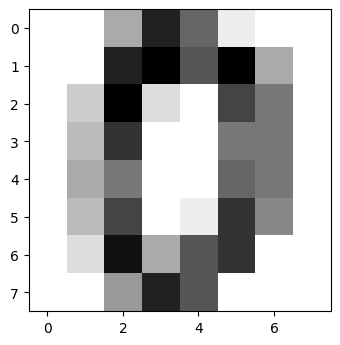

In [4]:
# Image reshaping example
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

# Plot the reshaped data
plt.imshow(np_image, cmap='gray_r')
plt.show()

Now let's visualise some of the images in the dataset. We will generate a scatter plot grid, with 2 rows and 4 columns.
- In the first row: 
  - Images corresponding to rows 0, 100, 200, and 300.
- In the second row:
  - Images corresponding to rows 1000, 1100, 1200, and 1300.

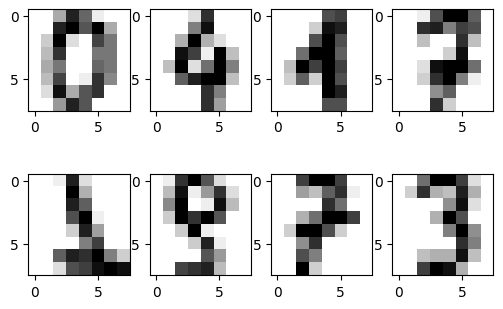

In [5]:
fig, axs = plt.subplots(2, 4)

axs[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axs[0, 1].imshow(data.iloc[100].values.reshape(8,8), cmap='gray_r')
axs[0, 2].imshow(data.iloc[200].values.reshape(8,8), cmap='gray_r')
axs[0, 3].imshow(data.iloc[300].values.reshape(8,8), cmap='gray_r')

axs[1, 0].imshow(data.iloc[1000].values.reshape(8,8), cmap='gray_r')
axs[1, 1].imshow(data.iloc[1100].values.reshape(8,8), cmap='gray_r')
axs[1, 2].imshow(data.iloc[1200].values.reshape(8,8), cmap='gray_r')
axs[1, 3].imshow(data.iloc[1300].values.reshape(8,8), cmap='gray_r')

plt.show()

## K-Nearest Neighbors Algorithm

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows it to capture nonlinearity in the data.

We will set up a pipeline for training and testing k-nearest neighbours using **`KNeighborsClassifier`** package. Cross-validation with 4-fold will also be applied.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train_knn(nneighbors, train_features, train_target):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_target)
    return knn

def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['true_label'] = test_target
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["true_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_target, test_target = labels.iloc[train_index], labels.iloc[test_index]
        model = train_knn(k, train_features, train_target)
        overall_accuracy = test(model, test_features, test_target)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9888728037614452

Let's visualize the resulting classification accuracies for different values of **`k`**.

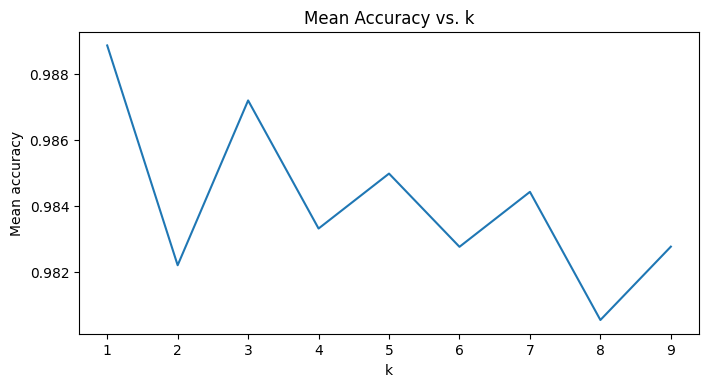

In [7]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.plot(k_values, k_overall_accuracies)
plt.title("Mean Accuracy vs. k")
plt.xlabel('k')
plt.ylabel('Mean accuracy')
plt.show()

In [8]:
k_overall_accuracies

[0.9888728037614452,
 0.9821912892848305,
 0.9872011878247959,
 0.9833073496659243,
 0.9849777282850779,
 0.9827517941103686,
 0.9844221727295223,
 0.9805270972531551,
 0.9827567433803515]

The highest accuracies occurred when the number of nearest neighbors was an odd number. However, in general, as the value of **`k`** increased the mean accuracy decreased.

There are a few downsides to using k-nearest neighbors:

 - high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
 - no model representation to debug and explore

## Neural Network With One Hidden Layer

Let's now try a neural network with a *single hidden layer* using *different numbers of neurons*. We will use the **`MLPClassifier`** package from scikit-learn.

In [9]:
from sklearn.neural_network import MLPClassifier

def train_nn(neuron_arch, train_features, train_target):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch, max_iter=2000)
    mlp.fit(train_features, train_target)
    return mlp

def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['true_label'] = test_target
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["true_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_target, test_target = labels.iloc[train_index], labels.iloc[test_index]
        model = train_nn(neuron_arch, train_features, train_target)
        overall_accuracy = test(model, test_features, test_target)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

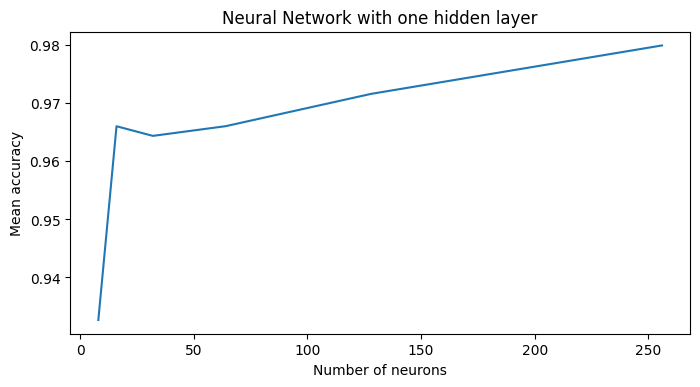

In [10]:
nn_one_neurons = [(8,), (16,), (32,), (64,), (128,), (256,)]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)
    
x = [i[0] for i in nn_one_neurons]
y = nn_one_accuracies

plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.title('Neural Network with one hidden layer')
plt.xlabel('Number of neurons')
plt.ylabel('Mean accuracy')
plt.show()

In [11]:
nn_one_accuracies

[0.9326664192031675,
 0.9660504825538234,
 0.9643912397921307,
 0.9660603810937887,
 0.9716270725068052,
 0.9799715416975996]

It looks like adding more neurons to the single hidden layer improved the classification accuracy to approximately 97%. Considering that k-nearest neighbors achieved approximately 98% of accuracy, it doesn't seem to have any advantages to using a single hidden layer neural network for this problem.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

## Neural Network With Two Hidden Layers

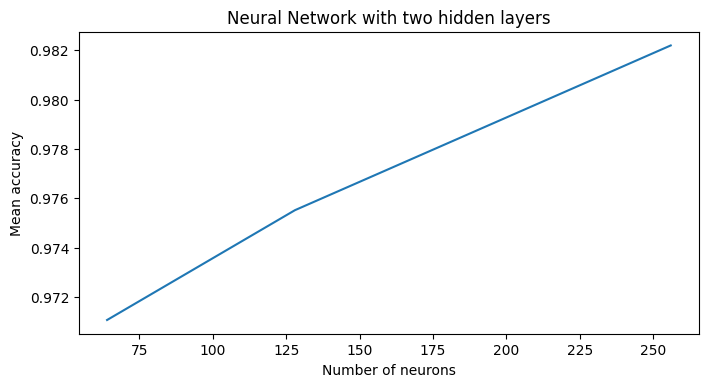

In [12]:
nn_two_neurons = [(64,64), (128,128), (256,256)]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)
    
x = [i[0] for i in nn_two_neurons]
y = nn_two_accuracies

plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.title('Neural Network with two hidden layers')
plt.xlabel('Number of neurons')
plt.ylabel('Mean accuracy')
plt.show()

In [13]:
nn_two_accuracies

[0.971070279633754, 0.9755209106656768, 0.9821962385548132]

The neural network with two hidden layers has improved the classification accuracy to approximately 98%. Using more hidden layers is known to increase the amount of overfitting that happens. 

To help us prevent overfitting, let's increase the number of folds we use for k-fold cross-validation to 6 while testing networks with 3 hidden layers.

## Neural Network With Three Hidden Layers

In [14]:
def train_nn(neuron_arch, train_features, train_target):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch, max_iter=2000)
    mlp.fit(train_features, train_target)
    return mlp

def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['true_label'] = test_target
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["true_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate_six(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.iloc[train_index], data.iloc[test_index]
        train_target, test_target = labels.iloc[train_index], labels.iloc[test_index]
        model = train_nn(neuron_arch, train_features, train_target)
        overall_accuracy = test(model, test_features, test_target)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

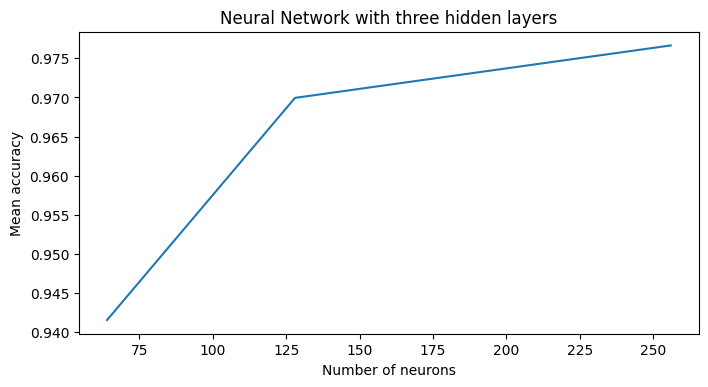

In [15]:
nn_three_neurons = [(10,10,10), (64,64,64), (128,128,128)]
nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)
    
x = [i[0] for i in nn_two_neurons]
y = nn_three_accuracies

plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.title('Neural Network with three hidden layers')
plt.xlabel('Number of neurons')
plt.ylabel('Mean accuracy')
plt.show()

In [16]:
nn_three_accuracies

[0.9415719063545152, 0.969946116685247, 0.9766443701226311]

The neural network with three hidden layers has improved the classification accuracy to approximately 98%, even with 6-fold cross-validation. This suggests overfitting could still be happening.

## Conclusion

In this project, we experimented with different models to classify handwritten digits. It doesn't seem that increasing the number of hidden layers with different numbers of neurons in the neural network model has brought a significant improvement in terms of accuracy. It is previously known that this could be due to overfitting.